In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from pylab import rcParams
rcParams['figure.figsize']= 14, 8
RANDOM_SEED = 42
LABELS = ["Normal", "Fraud"]

In [7]:
import pandas as pd

data = pd.read_csv("D:\\Customer Churn Prediction\\Churn_Modelling.csv")
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


**Clean and prepare the dataset**

In [9]:
data.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [10]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<Axes: xlabel='Gender', ylabel='count'>

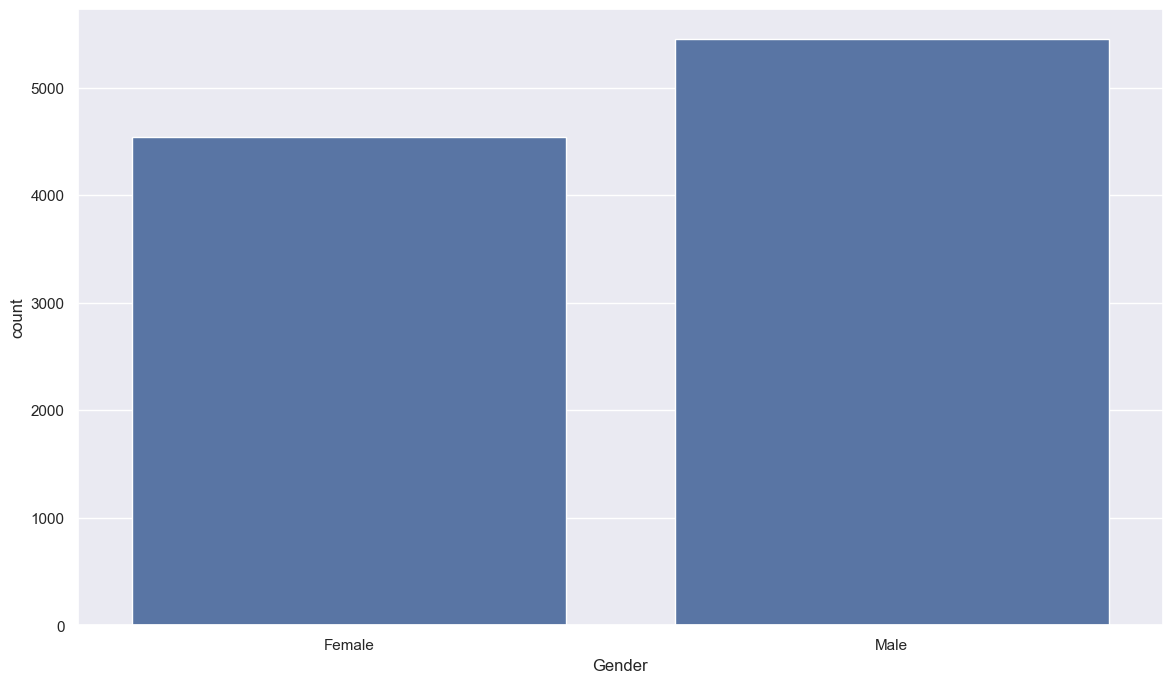

In [12]:
import seaborn as sns

# Set the Seaborn default theme and other settings
sns.set()

sns.countplot(x='Gender',data=data)

In [13]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
# Replace 'column_name' with the name of the column you want to check for missing values
data.dropna(subset=['RowNumber'], inplace=True)

**Data Visulize**

<Axes: xlabel='Geography', ylabel='count'>

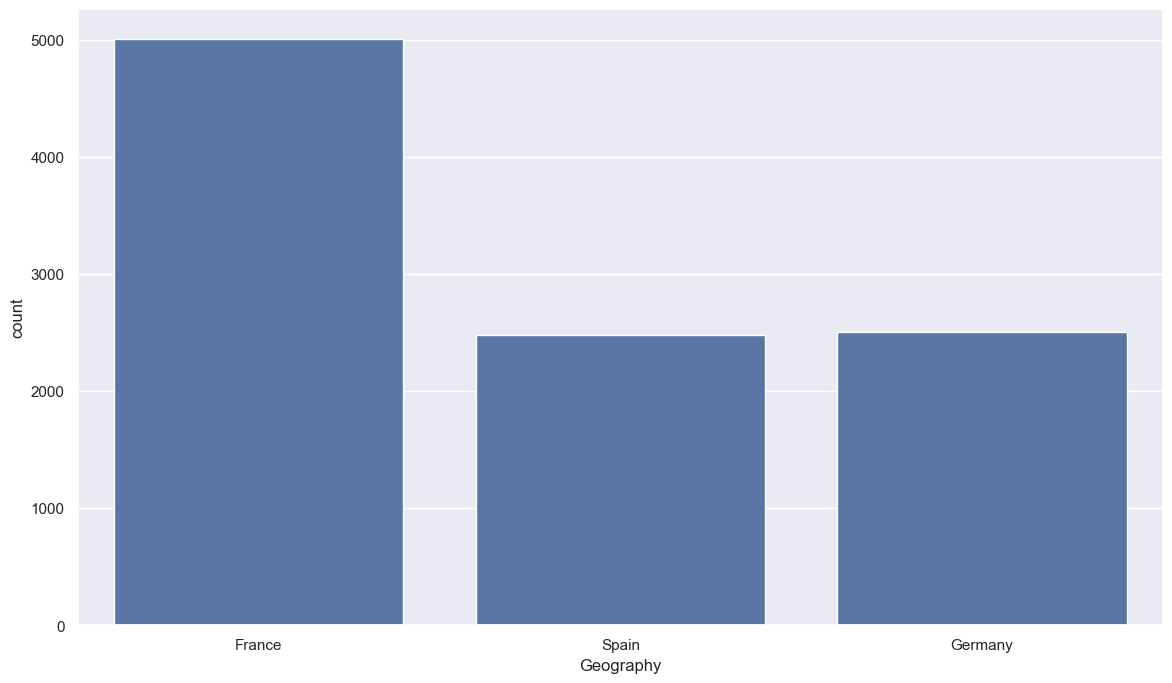

In [17]:
import seaborn as sns

# Set the Seaborn default theme and other settings
sns.set()

sns.countplot(x='Geography', data=data)

In [53]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='Age', ylabel='count'>

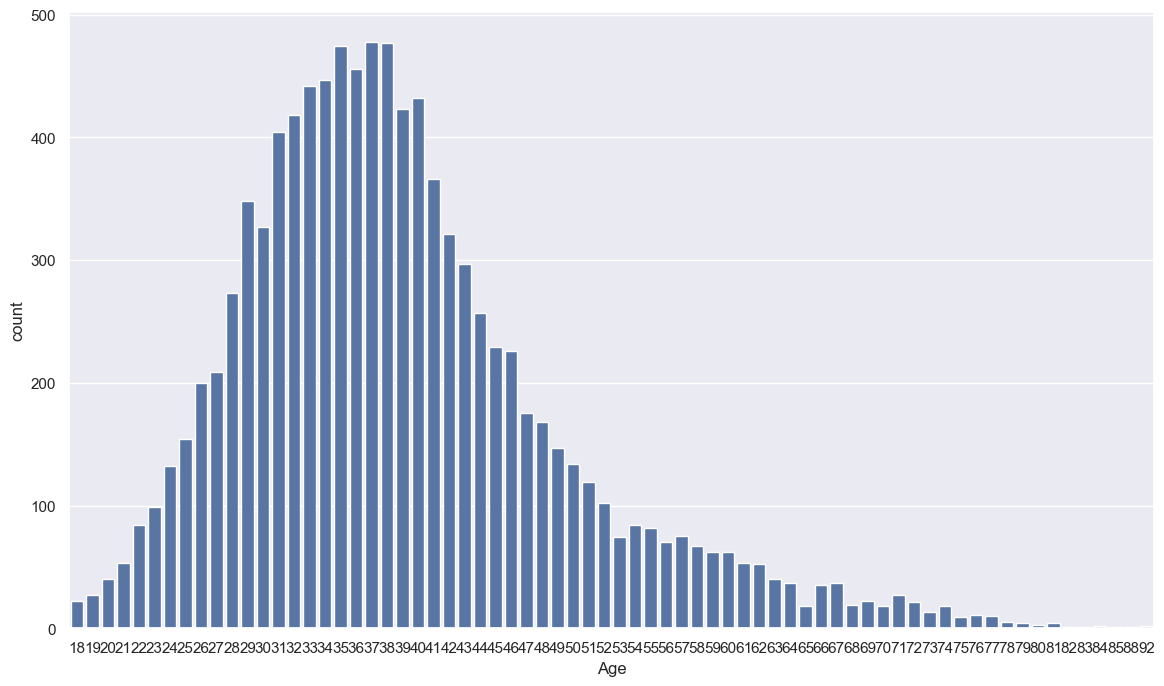

In [20]:
sns.countplot(x='Age', data=data)

**Encode Categorical Features Geography and Gender**

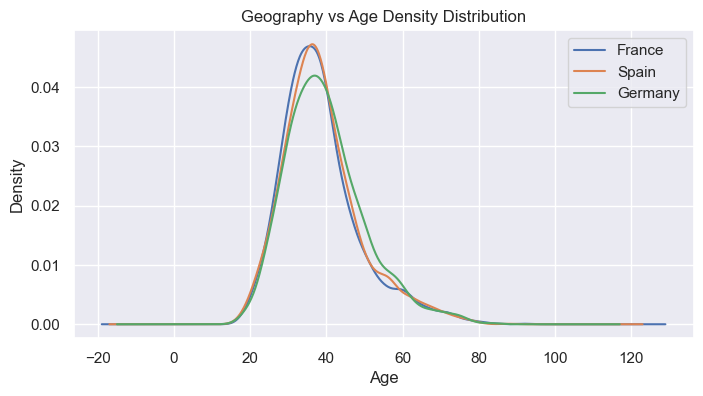

In [27]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 4))

# Get the unique geography values
geo_labels = data['Geography'].unique()

# Plot KDE of Age for each Geography
for geo in geo_labels:
    subset = data[data['Geography'] == geo]
    subset['Age'].plot(kind='kde', label=geo)

plt.title('Geography vs Age Density Distribution')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Density')
plt.grid(True)
plt.show()




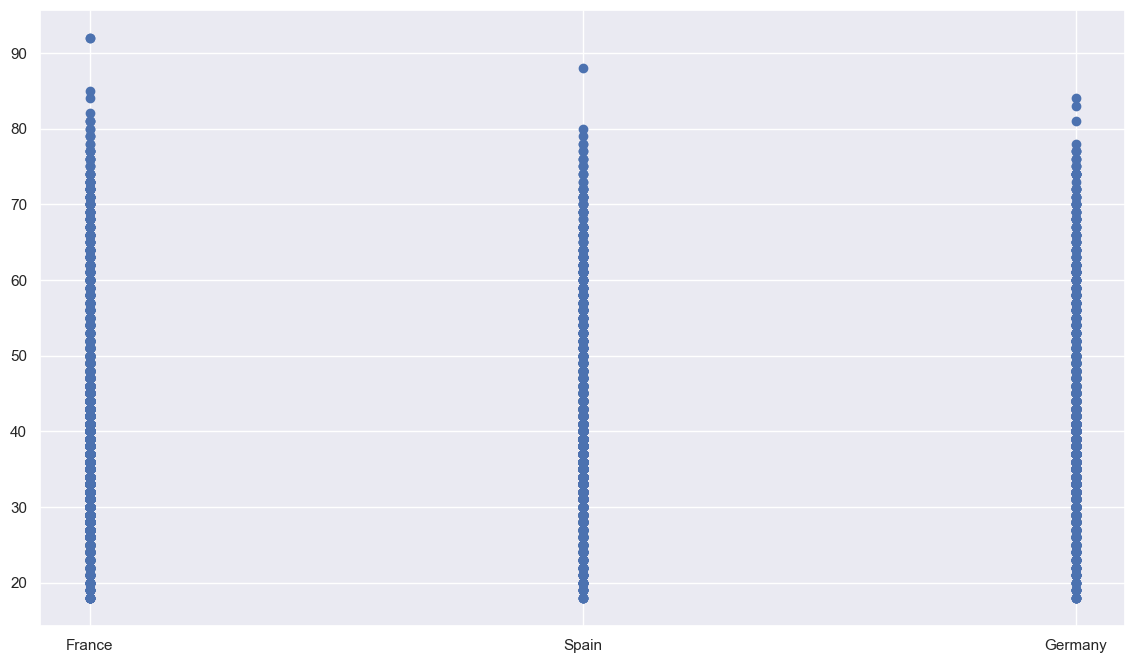

In [28]:
plt.scatter(data['Geography'], data['Age'])

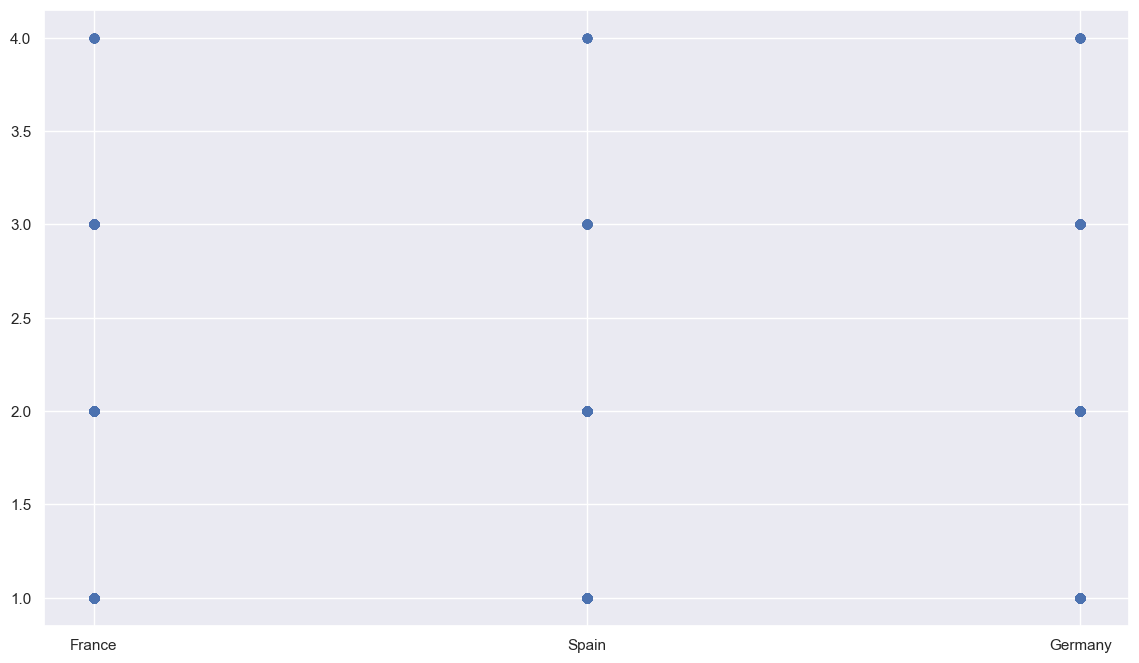

In [29]:
plt.scatter(data['Geography'], data['NumOfProducts'])

In [24]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


**Train a classification model**

In [33]:
x= data[['Tenure', 
         'Geography',
         'Balance', 
         'NumOfProducts', 
         'HasCrCard', 
         'IsActiveMember', 
         'EstimatedSalary', 
         'Exited']]
y=data['Surname']

In [34]:
x

,Tenure,Geography,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,2,France,0.00,1,1,1,101348.88,1
1,1,Spain,83807.86,1,0,1,112542.58,0
2,8,France,159660.80,3,1,0,113931.57,1
3,1,France,0.00,2,0,0,93826.63,0
4,2,Spain,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...
9995,5,France,0.00,2,1,0,96270.64,0
9996,10,France,57369.61,1,1,1,101699.77,0
9997,7,France,0.00,1,0,1,42085.58,1
9998,3,Germany,75075.31,2,1,0,92888.52,1


In [35]:
y

0        Hargrave
1            Hill
2            Onio
3            Boni
4        Mitchell
          ...    
9995     Obijiaku
9996    Johnstone
9997          Liu
9998    Sabbatini
9999       Walker
Name: Surname, Length: 10000, dtype: object

In [36]:
from sklearn.model_selection import train_test_split

In [39]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [40]:
len(x_train)

8000

In [41]:
len(x_test)

2000

In [42]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [46]:
y_test


937           Hsu
9355      Hawkins
2293         Tang
192     Golovanov
8675       Isaacs
          ...    
5624       Ch'ien
6005          Law
987          Lees
6152      Cummins
2092           Lo
Name: Surname, Length: 2000, dtype: object

**Analyze features**

In [48]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


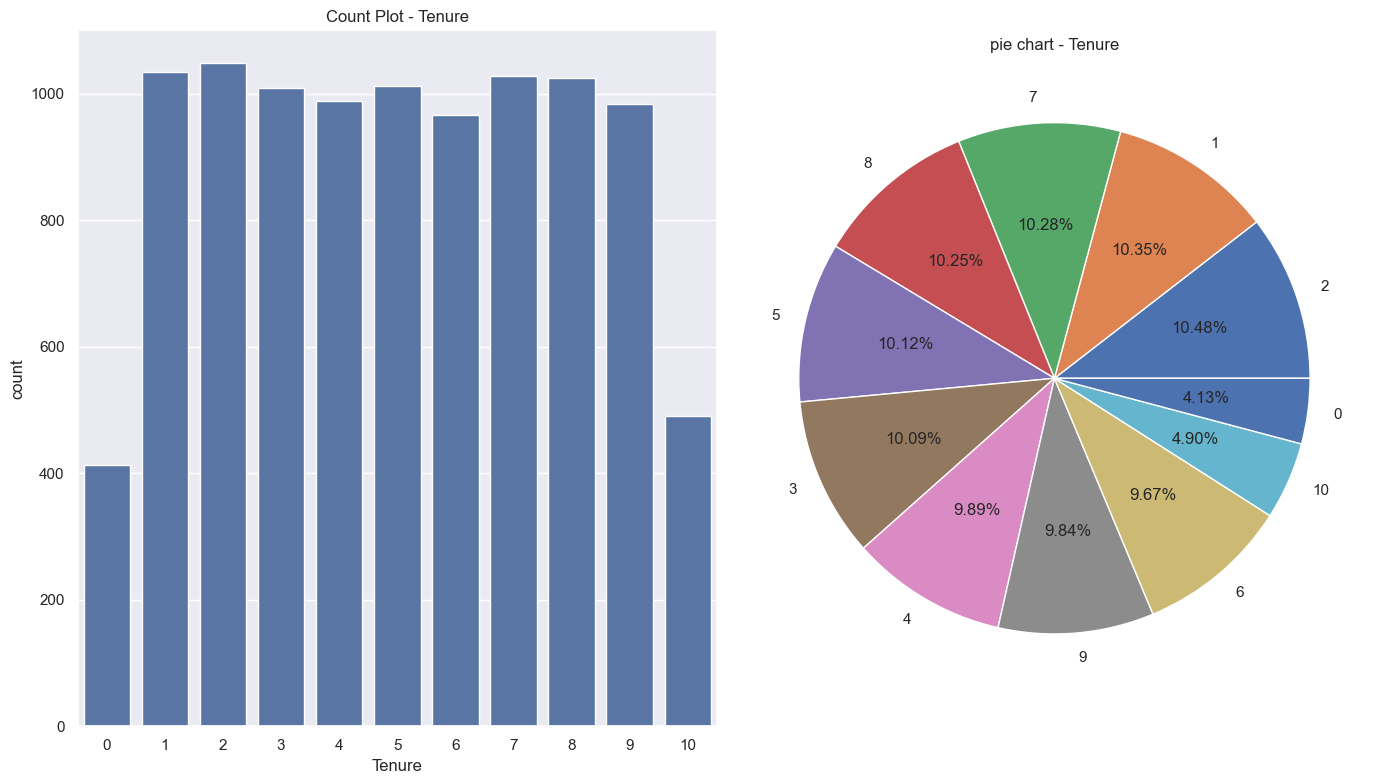

In [49]:
#Multi Variate Analysis

variable = 'Tenure'
plt.figure (figure = (7,6))

#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data= data)
plt.title(f'Count Plot - {variable}')

#pie chart
plt.subplot(1,2,2)
counts=data[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')


plt.tight_layout()

plt.show()

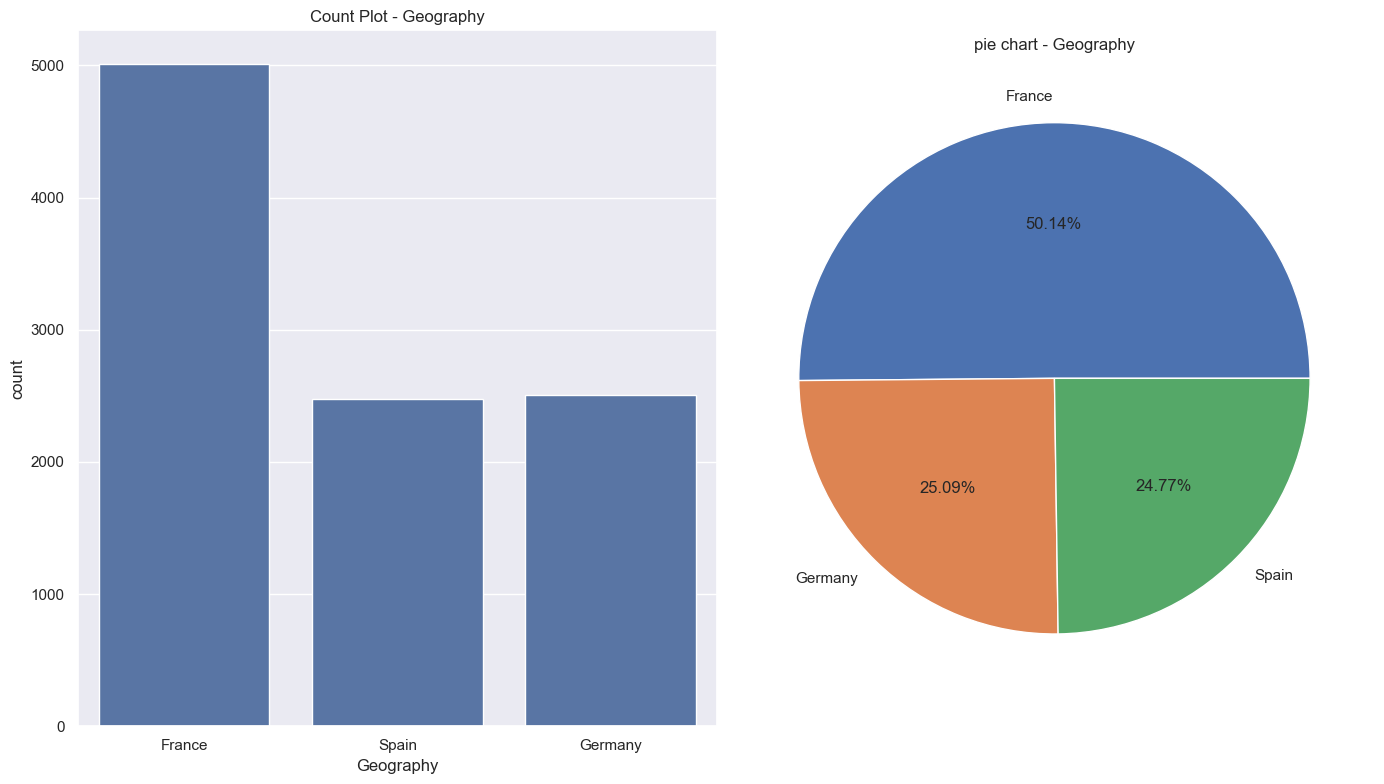

In [51]:
#UNI Variate Analysis 

variable = 'Geography'
plt.figure (figure = (6,5))

#count plot
plt.subplot(1,2,1)
sns.countplot(x=variable, data= data)
plt.title(f'Count Plot - {variable}')

#pie chart
plt.subplot(1,2,2)
counts=data[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'pie chart - {variable}')

plt.tight_layout()
plt.show()

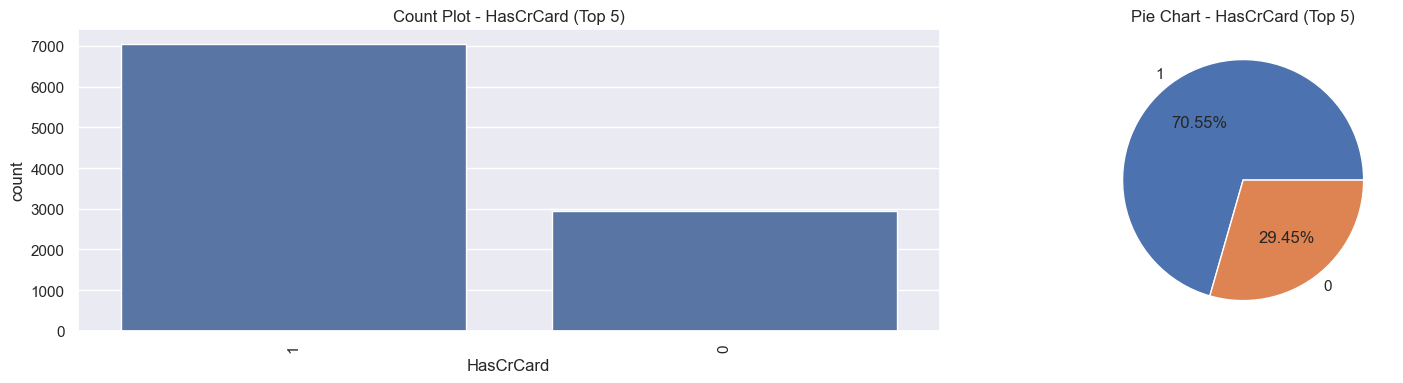

In [52]:
#Multi Variate Analysis
variable = 'HasCrCard'

# Get the top 5 values from the 'Metric tons of CO2e per capita (1990)
top_5_values = data[variable].value_counts().nlargest(5).index

df_top_5 = data[data[variable].isin(top_5_values)]

plt.figure(figsize=(17, 4))

plt.subplot(1, 2, 1)
sns.countplot(x=variable, data=df_top_5, order=top_5_values)
plt.title(f'Count Plot - {variable} (Top 5)')
plt.xticks(rotation=90)

# Pie chart
plt.subplot(1, 2, 2)
counts = df_top_5[variable].value_counts()
plt.pie(counts, labels=counts.index, autopct='%0.2f%%')
plt.title(f'Pie Chart - {variable} (Top 5)')

plt.tight_layout()

plt.show()

**Evaluation**

In [59]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix